# Importing Libaries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Hotel_Bookings = pd.read_csv('hotel_bookings.csv')

In [3]:
Hotel_Bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
Hotel_Bookings.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
Hotel_Bookings.shape

(119390, 32)

# Cleaning the data

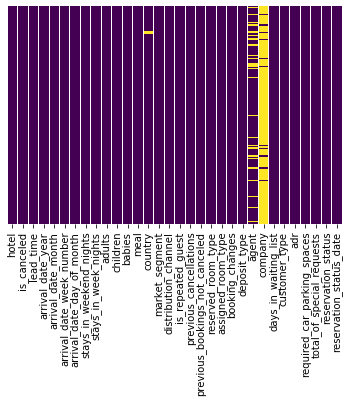

In [6]:
sns.heatmap(Hotel_Bookings.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [7]:
Hotel_Bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
Hotel_Bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
Hotel_Bookings.drop(['agent','company','reservation_status_date'],axis=1,inplace=True)

In [10]:
Hotel_Bookings['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
UMI        1
SMR        1
PYF        1
BDI        1
SLE        1
Name: country, Length: 177, dtype: int64

In [11]:
Hotel_Bookings['country']=Hotel_Bookings['country'].fillna('PRT')

In [12]:
Hotel_Bookings['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [13]:
Hotel_Bookings['children']=Hotel_Bookings['children'].fillna(0)

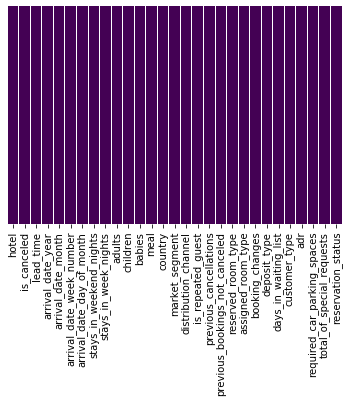

In [14]:
sns.heatmap(Hotel_Bookings.isnull(),yticklabels=False,cmap='viridis',cbar=False)

# Visualization of data

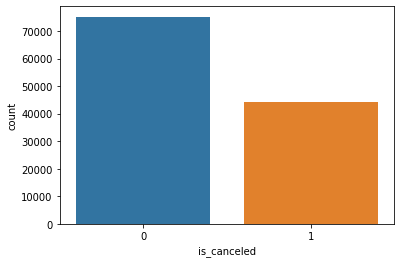

In [15]:
sns.countplot(x='is_canceled',data=Hotel_Bookings)

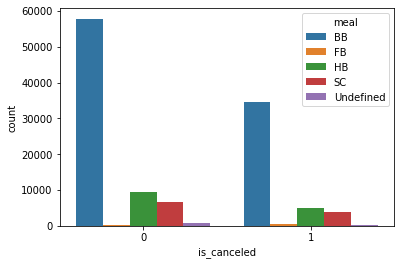

In [16]:
sns.countplot(x='is_canceled',hue='meal',data=Hotel_Bookings)

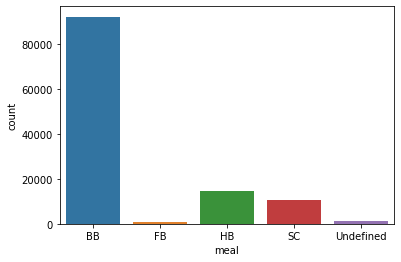

In [17]:
sns.countplot(x='meal',data=Hotel_Bookings)

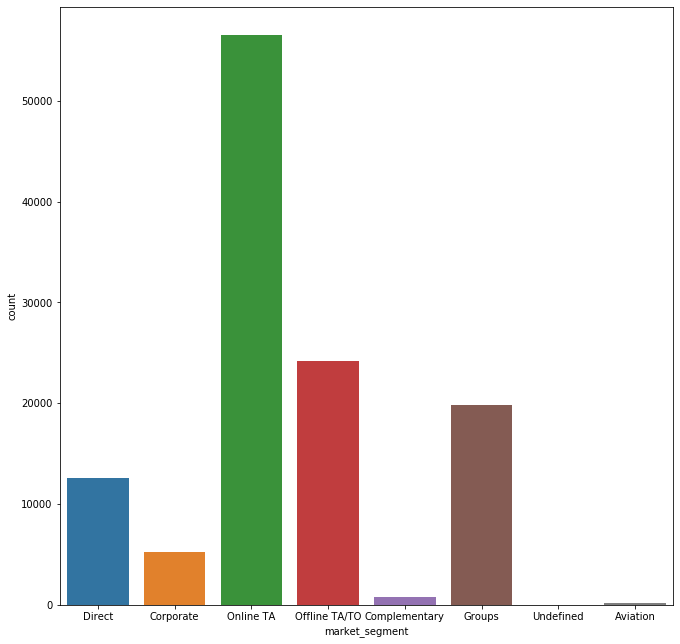

In [18]:
plt.figure(figsize=(11,11))
sns.countplot(x='market_segment',data=Hotel_Bookings)

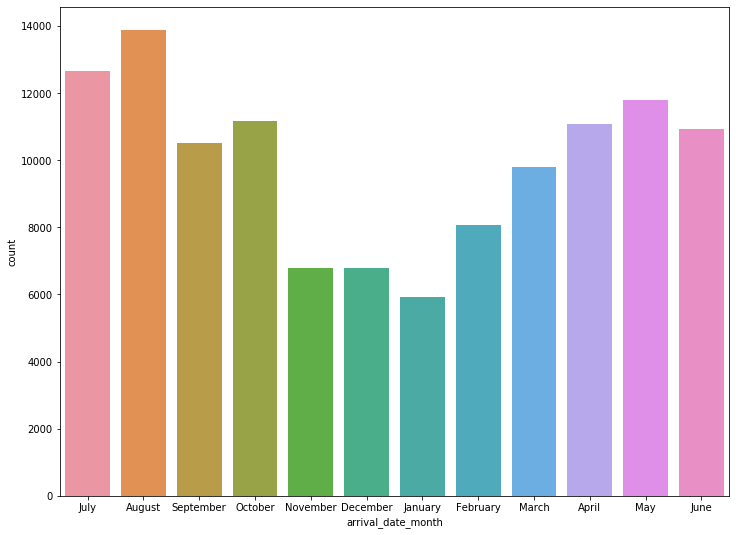

In [19]:
plt.figure(figsize=(12,9))
sns.countplot(x='arrival_date_month',data=Hotel_Bookings)

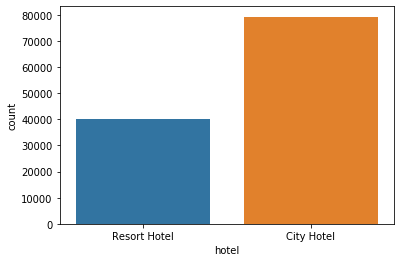

In [20]:
sns.countplot(x='hotel',data=Hotel_Bookings)

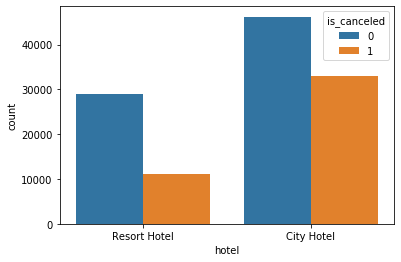

In [21]:
sns.countplot(x='hotel',hue='is_canceled',data=Hotel_Bookings)

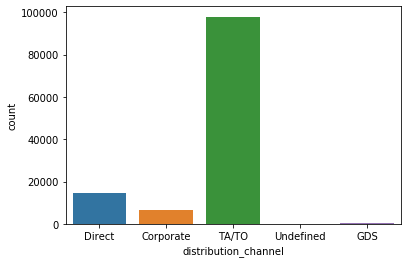

In [22]:
sns.countplot(x='distribution_channel',data=Hotel_Bookings)

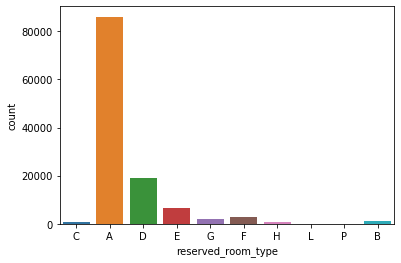

In [23]:
sns.countplot(x='reserved_room_type',data=Hotel_Bookings)

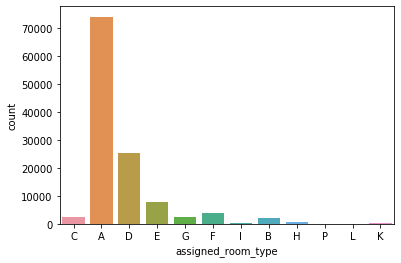

In [24]:
sns.countplot(x='assigned_room_type',data=Hotel_Bookings)

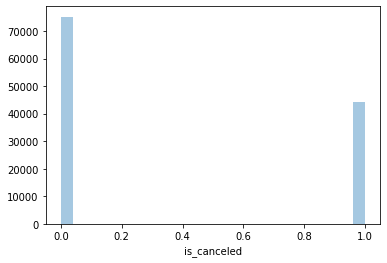

In [25]:
sns.distplot(Hotel_Bookings['is_canceled'],kde=False)

# Data Preparation and Feature Engineering
### Handling and Changing of  Categorical Variables

In [26]:
hotel=Hotel_Bookings['hotel']

In [27]:
Hotel_Bookings=Hotel_Bookings.drop('hotel',axis=1)

In [28]:
Hotel_Bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [29]:
Hotel_Bookings.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [30]:
  
a=pd.get_dummies(Hotel_Bookings['reserved_room_type'],drop_first=True)
b=pd.get_dummies(Hotel_Bookings['assigned_room_type'],drop_first=True)
c=pd.get_dummies(Hotel_Bookings['deposit_type'],drop_first=True)
d=pd.get_dummies(Hotel_Bookings['customer_type'],drop_first=True)
e=pd.get_dummies(Hotel_Bookings['reservation_status'],drop_first=True)
 

In [31]:
Hotel_Bookings.drop(['arrival_date_month','meal','distribution_channel','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','country','deposit_type','market_segment','meal','customer_type','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','arrival_date_month','reservation_status'],inplace=True,axis=1)

In [32]:
Hotel_Bookings=pd.concat([Hotel_Bookings,a,b,c,d,e],axis=1)

# Statistics on data

In [33]:
Hotel_Bookings.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,K,L,P,Non Refund,Refundable,Group,Transient,Transient-Party,Check-Out,No-Show
0,0,342,0,0,2,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,737,0,0,2,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,7,0,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,13,0,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,14,0,2,2,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [34]:
Hotel_Bookings.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,K,L,P,Non Refund,Refundable,Group,Transient,Transient-Party,Check-Out,No-Show
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,...,0.002337,0.000008,0.000101,0.122179,0.001357,0.004833,0.750591,0.210436,0.629584,0.010110
std,0.482918,106.863097,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,...,0.048285,0.002894,0.010025,0.327494,0.036811,0.069351,0.432673,0.407620,0.482918,0.100038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
Hotel_Bookings.corr()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,K,L,P,Non Refund,Refundable,Group,Transient,Transient-Party,Check-Out,No-Show
is_canceled,1.000000,0.293123,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,...,-0.032813,0.003773,0.013071,0.481457,-0.011312,-0.038698,0.133084,-0.124135,-1.000000,0.131752
lead_time,0.293123,1.000000,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,...,-0.027950,-0.002817,-0.009759,0.380179,0.016587,-0.031924,-0.173959,0.159548,-0.293123,-0.044286
stays_in_weekend_nights,-0.001791,0.085671,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,...,0.002988,-0.002688,-0.005966,-0.114275,0.001761,-0.007163,0.019485,-0.064920,0.001791,0.016969
stays_in_week_nights,0.024765,0.165799,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,...,0.002765,-0.002275,-0.008320,-0.079999,0.006791,-0.016182,0.007299,-0.064281,-0.024765,0.006017
adults,0.060017,0.119519,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,...,-0.055382,0.000717,-0.032131,-0.028980,0.003246,0.058976,0.091006,-0.115760,-0.060017,-0.033777
children,0.005036,-0.037613,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,...,-0.006957,-0.000754,-0.002613,-0.096668,-0.006754,-0.006649,0.096145,-0.092857,-0.005036,0.003699
babies,-0.032491,-0.020915,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,...,-0.002168,-0.000236,-0.000818,-0.030435,-0.003007,0.000513,0.021595,-0.022925,0.032491,-0.001370
is_repeated_guest,-0.084793,-0.124410,-0.087239,-0.097245,-0.146426,-0.032858,-0.008943,1.000000,0.082293,0.418056,...,0.055363,-0.000525,-0.001820,-0.058423,-0.001514,0.097977,0.023487,-0.030251,0.084793,0.003088
previous_cancellations,0.110133,0.086042,-0.012775,-0.013992,-0.006738,-0.024729,-0.007501,0.082293,1.000000,0.152728,...,-0.004583,0.003129,-0.001034,0.143314,-0.003803,-0.004186,-0.026525,0.015144,-0.110133,-0.009733
previous_bookings_not_canceled,-0.057358,-0.073548,-0.042715,-0.048743,-0.107983,-0.021072,-0.006550,0.418056,0.152728,1.000000,...,-0.003041,0.003600,-0.000918,-0.031509,-0.002919,0.021285,0.030540,-0.028603,0.057358,-0.001480


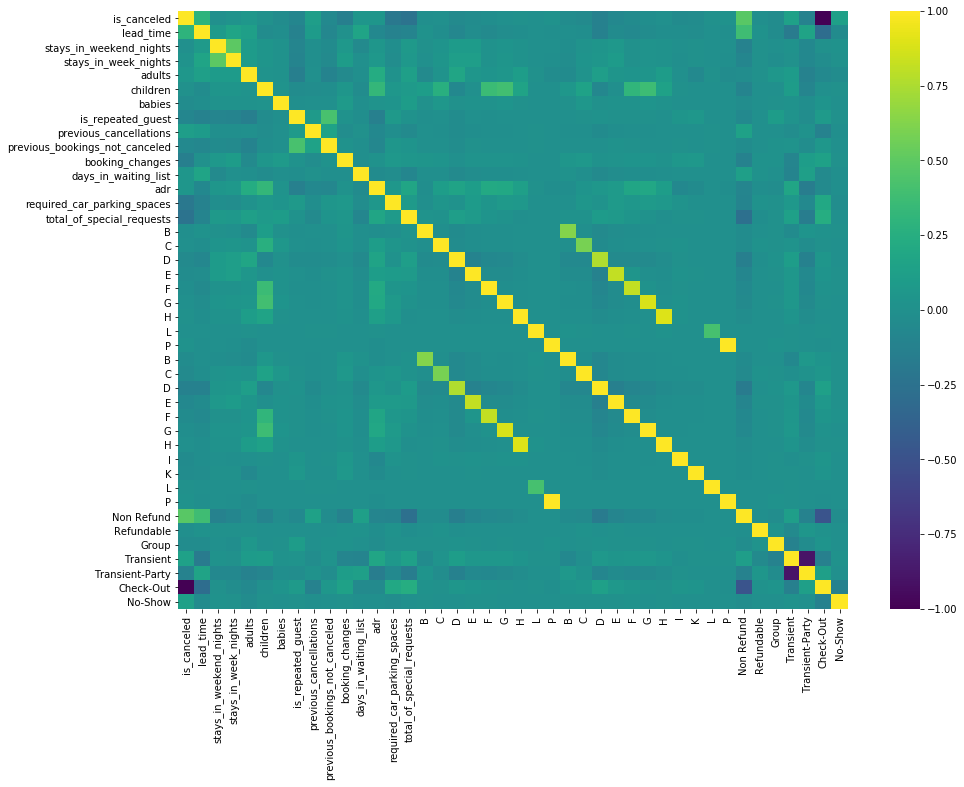

In [36]:
plt.figure(figsize=(15,11))
sns.heatmap(Hotel_Bookings.corr(),cmap='viridis')

### Splitting the dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = Hotel_Bookings.drop('is_canceled',axis=1)
y = Hotel_Bookings['is_canceled']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=101)

### Logistic Regression & Model Testing

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\oluwaseun gfx\anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
predictions = logmodel.predict(X_test)

In [43]:
from sklearn import metrics
prediction_test = logmodel.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

1.0


# Evaluation

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30141
           1       1.00      1.00      1.00     17615

    accuracy                           1.00     47756
   macro avg       1.00      1.00      1.00     47756
weighted avg       1.00      1.00      1.00     47756



In [46]:
predictions=pd.DataFrame(predictions,index=hotel.head(47756))

In [47]:
predictions.head()

,0
hotel,
Resort Hotel,1
Resort Hotel,0
Resort Hotel,1
Resort Hotel,1
Resort Hotel,1


In [48]:
predictions.tail()

,0
hotel,
City Hotel,1
City Hotel,1
City Hotel,0
City Hotel,1
City Hotel,0
